In [2]:
#import the libraries
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
import matplotlib.pyplot as plt

#read the data
d1 = pd.read_excel("C:\\Users\\project_inquiries.xlsx",  sheet_name='project_inquiries')
print("Column headings:")
print(d1.columns)

Column headings:
Index(['id', 'user_id', 'project_id', 'qualifications', 'created_at',
       'updated_at', 'state', 'time_slots', 'scheduled_for',
       'decision_deadline', 'conference_line_id', 'hours', 'pbc_rating',
       'npo_rating', 'satisfaction_rating', 'pbc_review', 'archived'],
      dtype='object')


In [3]:
#select only the finished, accepted or confirmed projects
data = d1.query('state == "completed" or state == "accepted" or state == "confirmed"')

#create a new dataset that has count of number of meetings for each project id
new = data.groupby("project_id")['id'].count().reset_index()

#select only the projects that has atleast 2 meetings
new=new[new.id>=2]

#rename the id column
new.rename(columns={'id':'Vol_count'},inplace=True)

In [23]:
#read the proejct export data
d2 = pd.read_excel("C:\\Users\\project_export.xlsx",  sheet_name='project_export')

d2.columns

Index(['id', 'organization_id', 'description', 'created_at', 'updated_at',
       'state', 'user_id', 'needs_accomplish', 'needs_support', 'needs_value',
       'campaign_id', 'image_id', 'project_inquiries_count', 'admin_id',
       'project_group', 'project_category_id', 'local_only', 'success_story',
       'partner_organization_id', 'match_job_id', 'satisfaction_rating',
       'agreed_at_community', 'timeline', 'publish_externally',
       'enable_success_story', 'is_archived', 'share_metadata'],
      dtype='object')

In [37]:
#read the relevant columns only
d2 = d2.loc[:,['id','state','created_at', 'updated_at']]

#merge the datasets on id variable
new_data = pd.merge(new,d2,how='left',left_on = 'project_id',right_on = 'id')

new_data.head()

,project_id,Vol_count,id,state,created_at,updated_at,Difference
0,840,2,840,completed,2015-06-13 18:02:13.378,2015-08-05 14:13:20.901,52
1,862,2,862,completed,2015-06-18 21:48:00.373,2015-11-10 14:09:12.727,144
2,876,2,876,completed,2015-06-22 16:20:29.597,2016-05-18 20:27:28.343,331
3,954,2,954,completed,2015-07-09 16:14:07.679,2016-11-29 15:50:48.091,508
4,1190,2,1190,completed,2015-08-27 17:50:43.032,2016-03-21 20:31:46.671,207


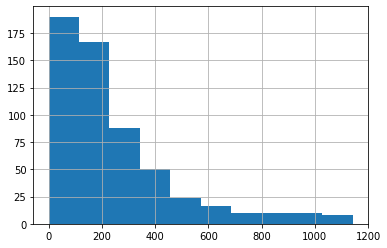

In [43]:
#calculate the difference between the created date and updated date in days and name the column 'difference'
new_data['Difference'] = new_data['updated_at'].sub(new_data['created_at'], axis=0).dt.days

#plot the histogram of difference column
new_data['Difference'].hist()